<a href="https://colab.research.google.com/github/sreejareddy-18/SCT_ML_1/blob/main/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.D7748P_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.
Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.72      0.63       212
           1       0.52      0.35      0.42       188

    accuracy                           0.55       400
   macro avg       0.54      0.53      0.52       400
weighted avg       0.54      0.55      0.53       400

Confusion Matrix:
 [[152  60]
 [122  66]]


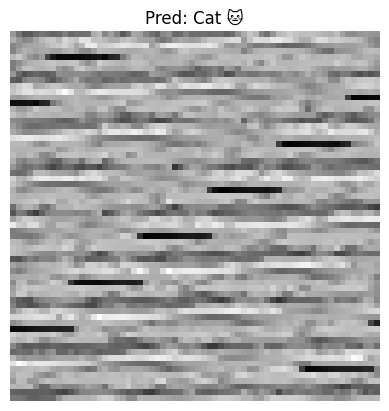

In [ ]:
!pip install tensorflow-datasets
import numpy as np
import tensorflow_datasets as tfds
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt


ds = tfds.load('cats_vs_dogs', split='train[:2000]', shuffle_files=True, as_supervised=True)
images, labels = [], []R
for img, lb in ds:

    img = tfds.as_numpy(img)
    gray = np.dot(img[..., :3], [0.2989, 0.5870, 0.1140])
    gray = np.resize(gray, (64, 64))  # resize to 64×64
    images.append(gray.flatten())
    labels.append(lb)

X = np.array(images) / 255.0
y = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = SVC(kernel='linear')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


def predict_and_show(idx):
    img = X_test[idx].reshape(64,64)
    pred = model.predict([X_test[idx]])[0]
    plt.imshow(img, cmap='gray')
    plt.title("Pred: " + ("Dog 🐶" if pred else "Cat 🐱"))
    plt.axis('off')
    plt.show()

predict_and_show(5)
